<h1>Machine Learning I: WS 14/15                        ---- homework by Tom Nick and Niklas Gebauer</h1>

<h3>Introduction to Ipython Notebooks</h3>

Please consult https://github.com/ipython/ipython/tree/master/examples/notebooks#a-collection-of-notebooks-for-using-ipython-effectively for use of ipython notebooks.

http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb provides great examples of plotting within ipynb

Make sure you execute (shift + enter) all necessary code blocks before using them

Please add titles to your plots and set the corresponding label to every axis. An example you can use:

Populating the interactive namespace from numpy and matplotlib


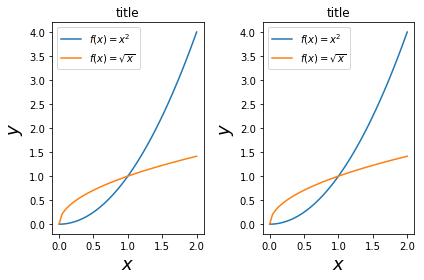

In [1]:
# run this first if you want to plot the example yourself
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

# adjust it if you want to see the effects
x = np.linspace(0,2)

fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in axes:
    ax.plot(x, x**2, label=r"$f(x) = x^2$")
    ax.plot(x, x**0.5, label=r"$f(x) = \sqrt{x}$")
    ax.set_xlabel(r'$x$', fontsize=18)
    ax.set_ylabel(r'$y$', fontsize=18)
    ax.set_title('title') # ALWAYS set a title
    ax.legend(loc=2) # Add a legend if necessary
fig.tight_layout() # Make sure the figures don't overlap

# Ignore the warning, as using axes in this fashion will make plotting significantly easier

#In part 2 also consider creating a figure with a specific number of subplots. We looked at i%4.

#Ignore the warning

<h3>Exercise Sheet 1: Bayesian Decision Theory </h3>

In this programming assignment we will use Bayes' rule to build a simple junk-mail filter using data avaialbe at http://www.aueb.gr/users/ion/data/enron-spam/.

The classifier distinguishes between two classes:

* **x = 1 for spam messages **
* **x = 0 for ham ( non-spam ) messages **

The messages are analyzed by checking for containment of certain words shown to be highly associated with a specific type of message.

* Bank, transfer, buy, viagra... for spam messages
* Paper, conference, proposal, experiment... for ham messages, as the data was mostly gathered from emails of researchers

The classifier determines the probability for each class **assuming independence between occurences of known keywords**:

$P(x=i|message) = \prod_{word \in message} p(x=i|word)$

and using Bayes' rule:

$p(x=i|word) = \frac{p(word|x=i)p(x=i)}{p(word|x=1)p(x=1) + p(word|x=0)p(x=0)}$

The message is classified as spam afterwards based on a threshold **T**:

$p(x=1|message) > T * p(x=0|message)$

As we are only interested in the ratio and not the values of the probabilities themselves, we can also drop the denominator to get

$p'(x=i|word) = p(word|x=i)p(x=i)$.

<h3>Part I: Calculating the ratio (10P) </h3>

Finish the code segment bellow to compute the ratios for the provided data, given the training values (which contain p(word| x=1) and p(word| x=0) as well as the columns which will be used (i.e. only the given words are examined, not all of them). The priors $p(spam)$ and $p(ham)$ are provided 

Make sure to account for cases where the number of columns is large and we might run into numerical errors when nearing zero. For example, with 40 columns used and most factors smaller than 0.1, we will likely go well bellow 1e-40 when computing the scores. As we are only interested in the ratio, we can freely multiply **both values** with a constant when we wish to.

The data is divided the following way:

* trainingSpam and trainingHam are arrays containing the estimates for p(word|x=1) and p(word|x=0). They are arrays of len 600, but only the first 50 fields are relevant
* testData is a matrix of shape 400 (number points) x 50(number words). testData[i,j]=1 if message i contains the word j
* testLabels is an array containing the labels for each of the test messages
* validation data and labels have the same description as the test data. They are used for tuning the model (selecting the paramater T, examining the ROC curve...), while the test data is used to check the final result quality on unseen data.

In [25]:
#Run the following to extract data used for training and testing purposes
trainingSpam=numpy.load('1training_spam.npy')
trainingHam=numpy.load('1training_ham.npy')
testData=numpy.load('1testData.npy')
testLabels=numpy.load('1testLabels.npy')
validationLabels=numpy.load('1validationLabels.npy')
validationData=numpy.load('1validationData.npy')
print(trainingSpam.shape)
print(trainingHam.shape)
print(testData.shape)
print(testLabels.shape)
print(validationData.shape)
print(validationLabels.shape)
print(validationData[:5,:40])

(600L,)
(600L,)
(400L, 50L)
(400L, 1L)
(400L, 50L)
(400L, 1L)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
   0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.
   0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
   0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
   1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  1.]]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
def compute_ratio(trainingHam, trainingSpam,data, columns):
    """
    Classifies the testData using the specified columns with the given threshold T
    
    trainingHam - Contains the estimated probabilities p(word|ham) for each word. 
                  Shape num_features x 1
    trainingSpam - Contains the estimated probabilities p(word|spam) for each word. 
                   Shape num_features x 1
    data - The data which will be classified. Shape num_test_messages x num_features
    columns -   List (or numpy array) containing the columns which are to be used. 
                For example. if it contains [1,14,15] the scores are to be computed 
                by using the values for those 3 words only (i.e. disregarding all 
                other words).
    """
    
    prior_spam = 0.6
    prior_ham = 0.4
    
    # getting the relevant columns (words) of the likelihoods
    spam = trainingSpam[columns]
    ham = trainingHam[columns]
    
    # getting the relevant columns (words) of the data
    data = data[:,columns]
    #print data[100:110]
    
    # compute the posterior for each word (without denominator)
    #spam = spam*prior_spam
    #ham = ham*prior_ham
    #print ham
    #print spam
    
    # compute posterior for all mesages
    dataSpam = data*spam
    dataHam = data*ham
    dataSpam *= 100 #prevent from under flow
    dataHam *= 100
    dataSpam[dataSpam==0] = 1.0 # set columns of words which aren't in the message to 1 so that we can take the product
    dataHam[dataHam==0] = 1.0
    spam_factor = np.prod(dataSpam, axis=1, keepdims=True) # compute the product of all word posteriors
    ham_factor = np.prod(dataHam, axis=1, keepdims=True)   # in order to obtain the message's posterior
    #print spam_factor[8]
    #print dataSpam[100:110]
    
    #spam_factor = numpy.ones((data.shape[0],1))
    #ham_factor = numpy.ones((data.shape[0],1))
   
    spam_factor*=prior_spam #include the priors
    ham_factor*=prior_ham #include the priors
    
    
    
    # Make sure we don't get enormous ratios
    #ham_factor += (0.0001*spam_factor)
    #spam_factor *=1.0001
    
    ratio = spam_factor/(ham_factor)
    return ratio

In [29]:
# You can use this for debugging purposes

tmp = compute_ratio(trainingHam,trainingSpam,validationData,
                    [1,2,3,4,5,6,7,8,9,10])
a = tmp[100:110]
sample_ratios = numpy.load('Sample_ratios.npy')
#print a
#print sample_ratios
for i in range(10):
    assert(a[i]>(sample_ratios[i]-0.01) and a[i]<(sample_ratios[i]+0.01))
print "Results seem to match"

Results seem to match


<h3>Part II: Choosing parameters (20P) </h3>
We need to determine a set of columns which produces good results **and a threshold parameter T**. However as there are $2^{num features}$ possible combinations for the column set, we can't implement a brute force solution. 

One way to limit our search space is to look for a solution iteratively. We will limit our search space by iteratively searching for the best column to add to our current set, starting with an empty set of columns. This way we have $O(n*k)$ complexity, where k is the upper bound for the number of features to consider, rather than exponential complexity. We need to examine the effects of adding a column and find a threshold value $T$ which performs best. **The validation set is used for this**. Training then looks like this:

* Start with an empty set of columns
* Iterate until we reach the desired number k, in this case 32
    * Iterate over all columns not in the set
        * We need to check the values for **a wide range of values for the parameter T**. 
        * The optimal value for T as well as the optimal column added (j) need to be recorded
        * To visualize the effects of the parameter T we record the true-positive rates and false-positive rates necessary to visualize the ROC curve (see: http://en.wikipedia.org/wiki/Receiver_operating_characteristic )
    * We visualize the ROC curve for the new set of columns. So if we found that coulmn 3 was the best addition, we visualize result quality for columns $\cup$ {3}. The ROC curve shows values we observed for various T
    * To check quality, we also include the F1 score on the test data for the chosen optimal value of T (so only the value that performed best on the validation data, not a range). This is the final measure of quality.

An example of our results is included bellow. There are 4 subplots per figure, the figure includes a line x=x (red) and the roc curve(blue). The parameters shown are:

* F1 score on validation data
* F1 score on test data
* The number of columns used (i)

Run tests using the full validation set, as well portions of it. Make sure you select a segment which contains both types of messages. The first 200 are spam and the following 200 aren't.

In [10]:
def run_experiment(trainingHam,trainingSpam,validationData,
                   validationLabels,testData,testLabels):
    T = np.linspace(0.05,10,num=100)
    mask = np.ones((validationData.shape[0],len(T)))
    columns = []
    
    fig = plt.figure(figsize=(20,40))
    
    # get number of positives and negatives in our test and validation data
    val_positives = np.sum(validationLabels)
    val_negatives = validationLabels.shape[0] - val_positives
    test_positives = np.sum(testLabels)
    test_negatives = testLabels.shape[0] - test_positives
    
    best_acc = 0
    best_T = 0
    best_col = 0
    best_results = []
    
    
    for i in range(1,33): #You can make this smaller during testing
        #Find optimal column and its T
        for j in range(50):
            if not (j in columns):
                ratios = compute_ratio(trainingHam,trainingSpam,validationData,columns+[j])
                rat_mat = ratios * mask
                results = rat_mat > T                       #check where ratio is bigger than threshold
                #print results[[0,399],20]
                label_comp = results == validationLabels    #check where labels equal the result
                accuracies = np.sum(label_comp, axis = 0)   #count the number of correct classifications
                #print accuracies[0:50]
                current_acc = np.amax(accuracies)           #find the greatest accuracy
                indices = np.argwhere(accuracies==current_acc)  #find indices of the greatest accuracy
                current_ind = indices[len(indices)/2]       #take an index close to the middle of possible indices
                current_T = T[current_ind]                  # get the corresponding value for T
                if current_acc > best_acc:                  #keeping track of the best found column so far
                    best_col = j
                    best_acc = current_acc
                    best_T = current_T
                    best_results = results
                    best_ind = current_ind
                    
                    
        #Add the column to the set
        columns = columns + [best_col]
        best_acc = 0
        
        
        #Visualize ROC curve with the two F1 scores
        
        #initialize plot and y=x curve
        plt.subplot(8,4,i)
        plt.plot(np.linspace(0.0,1.0,num=11),np.linspace(0.0,1.0,num=11), color='red', marker=None)
        
        # calculate true positive rates and false positive rates for all T's
        all_tp = np.sum(np.logical_and((best_results == True), (validationLabels == True)),axis=0)
        all_fp = np.sum(np.logical_and((best_results == True), (validationLabels == False)),axis=0)
        tp_rate = all_tp/val_positives
        fp_rate = all_fp/val_negatives
        
        #plot rates
        plt.plot(fp_rate,tp_rate, color='blue', marker='x')
        
        #calculate F1 score on validation set
        best_fn = np.sum(np.logical_and((best_results[:,best_ind] == False), (validationLabels == True)))
        best_tp = all_tp[best_ind]
        best_fp = all_fp[best_ind]
        F1_val = np.around(2*best_tp/float((2*best_tp+best_fp+best_fn)),2)
        #print F1_val
        
        #calculate F1 score on test set
        test_ratios = compute_ratio(trainingHam,trainingSpam,testData,columns)
        test_results = test_ratios > current_T
        test_fn = np.sum(np.logical_and((test_results == False), (testLabels == True)))
        test_tp = np.sum(np.logical_and((test_results == True), (testLabels == True)))
        test_fp = np.sum(np.logical_and((test_results == True), (testLabels == False)))
        F1_test = np.around(2*test_tp/float((2*test_tp+test_fp+test_fn)),2)
        #print F1_test
        
        #add title with F1 scores
        plt.title('F1 for val = ' + str(F1_val[0]) + ', F1 for test = ' + str(F1_test) + ', i = ' + str(i))

        
    #fig.tight_layout()
    

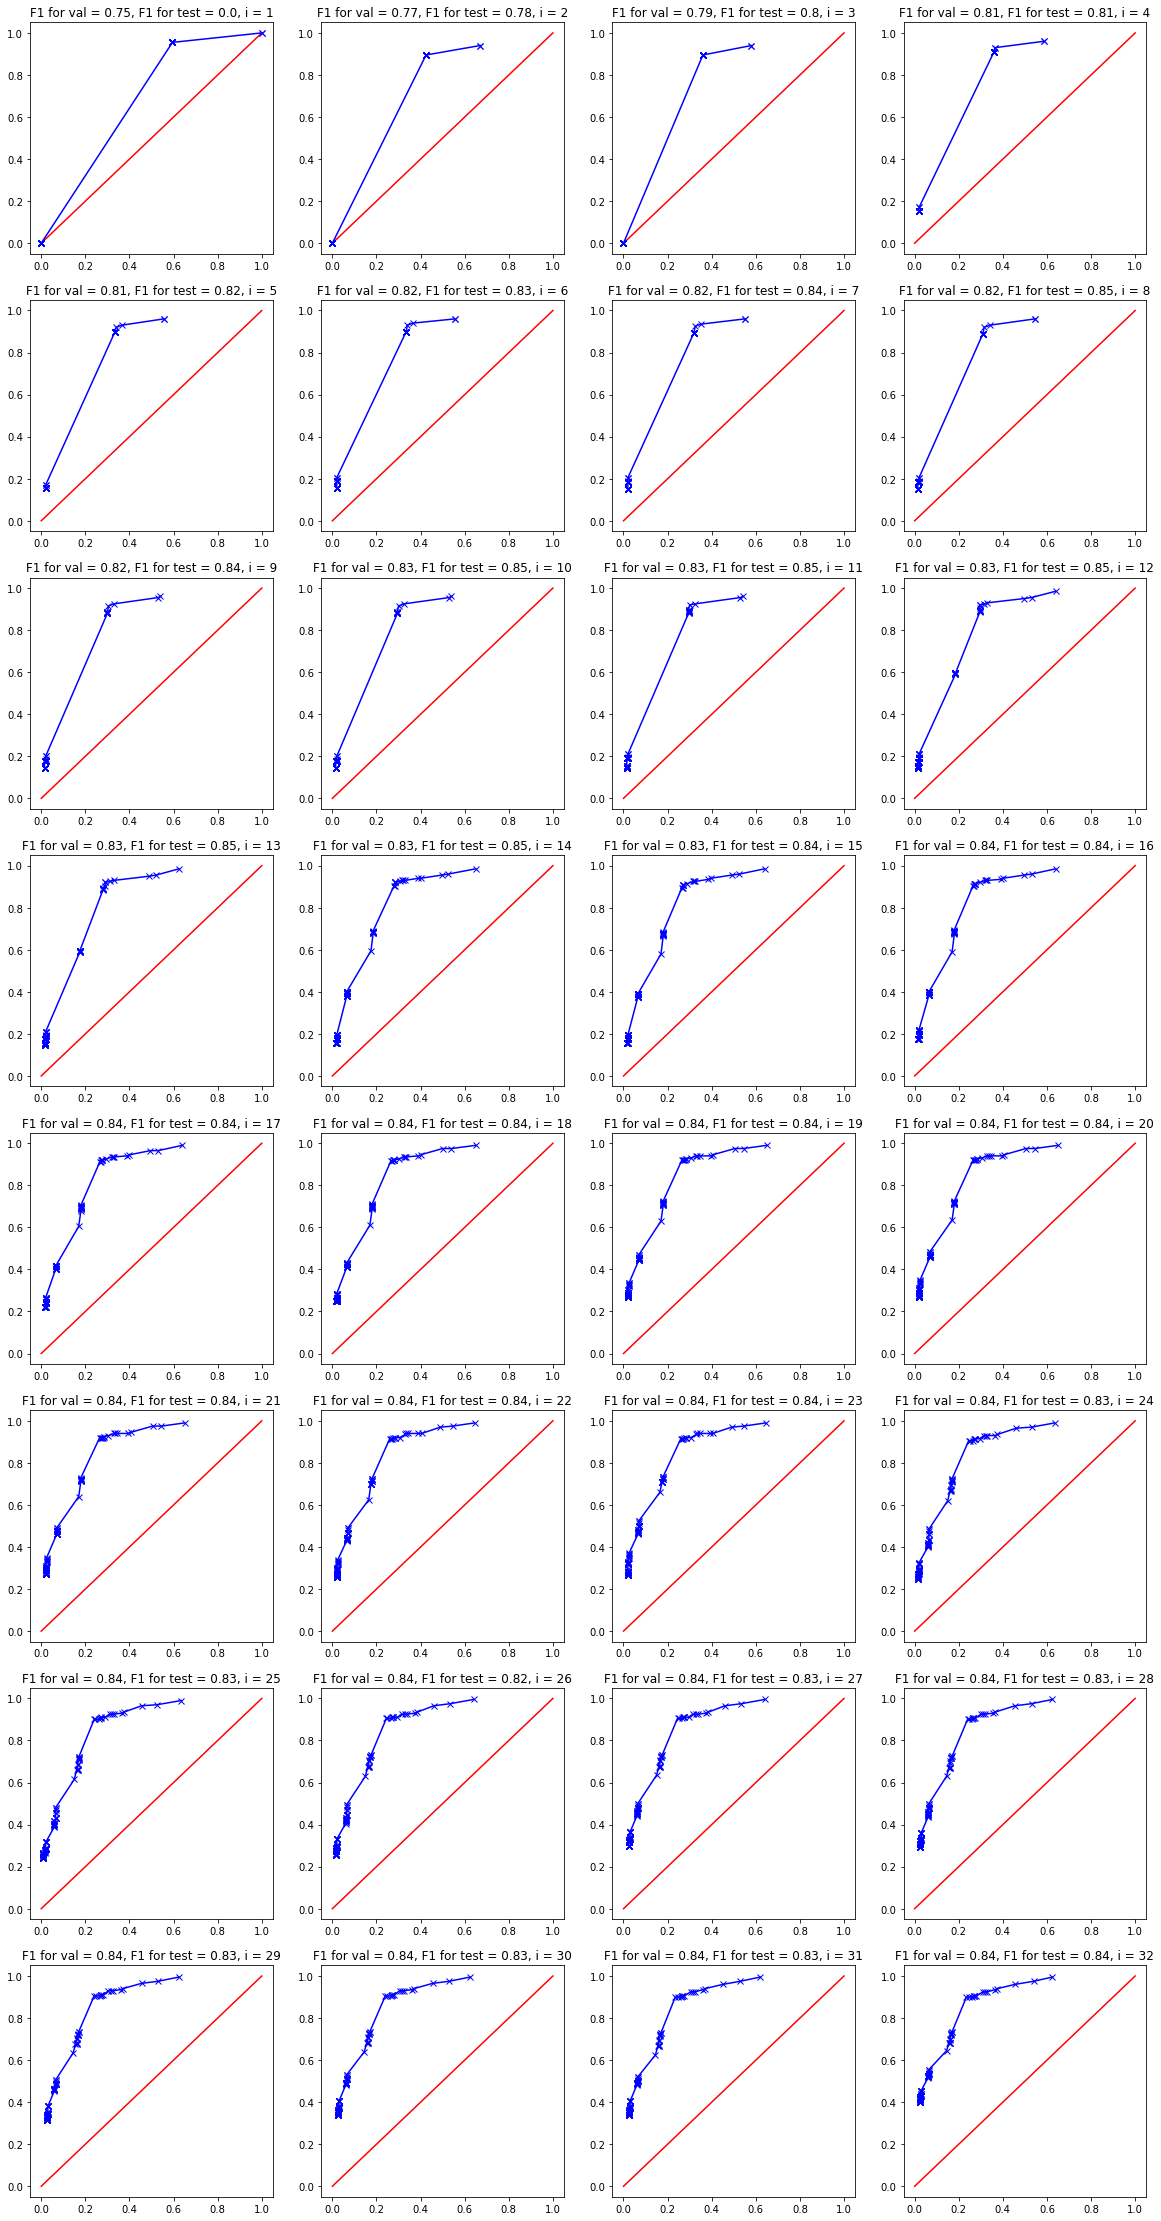

In [11]:
run_experiment(trainingHam,trainingSpam,validationData,validationLabels,testData,testLabels)

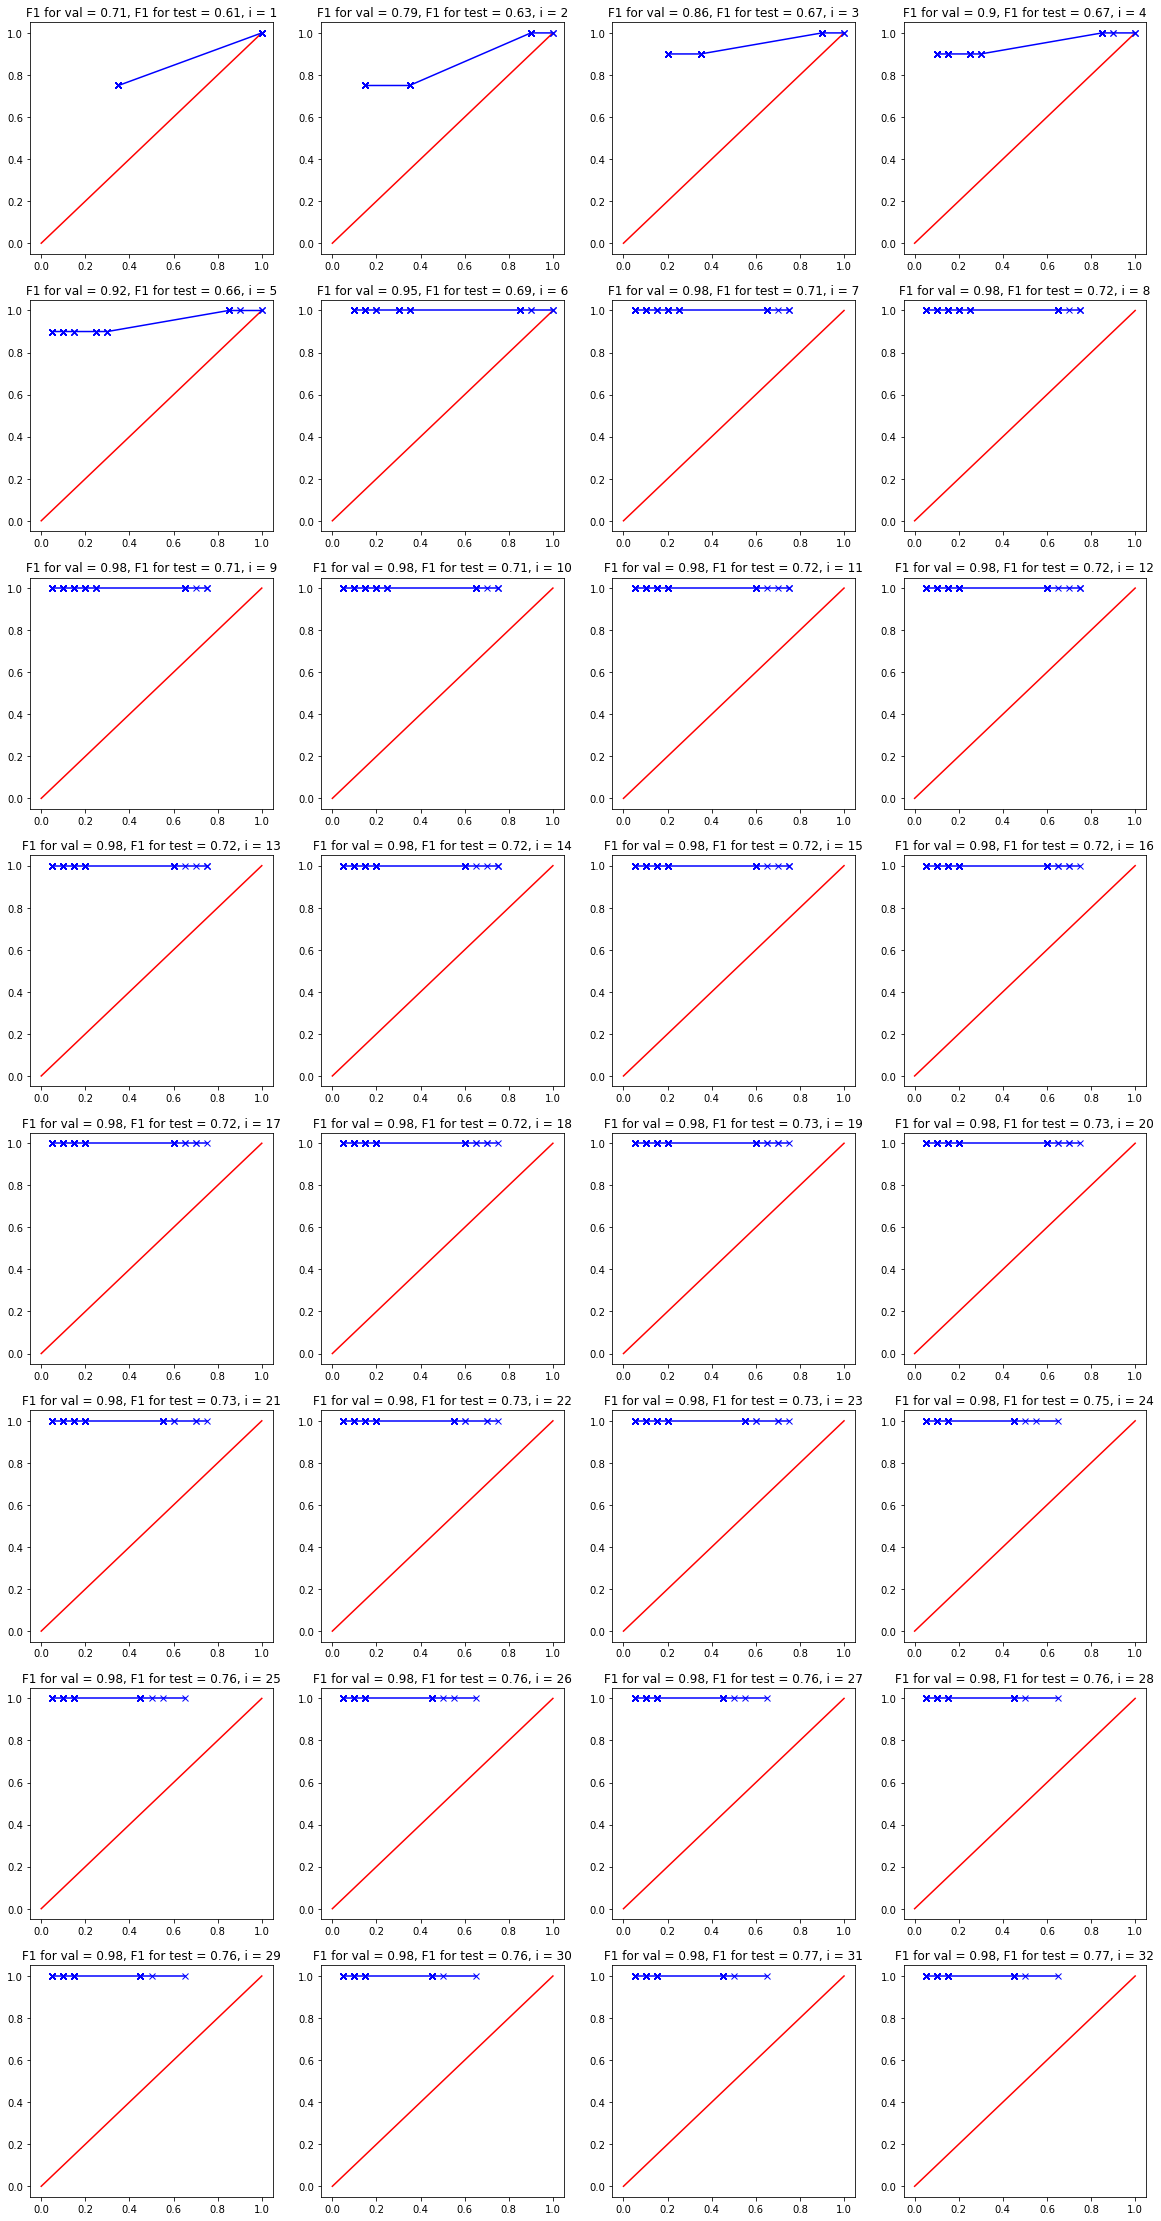

In [12]:
run_experiment(trainingHam,trainingSpam,validationData[180:220,:],validationLabels[180:220],testData,testLabels)

<h3>Part III: Analysis (10P) </h3>

*Will our iterative approach for finding the solution always find an optimal solution? Explain your answer.*

**No, it will not always find an optimal solution. We limit ourselves by irreversibly choosing one column, because in the following steps we will just be able to judge the performance based on a combination of a new column and our already chosen columns. But there might for example exist a better solution, that doesn't contain the column that we have chosen in our very first iteration. Our approach will not be able to inspect those combinations not containing the first chosen column.**

*Explain the need for separate validation and test data when conducting tests*

**It's important to choose parameters on a different set than the one you test your final performance on, because while validation you can easily overfit or underfit the validation set. If you overfit, the classifier will work perfectly fine on the validation set but poorly generalize and thus be useless. If you underfit the boundary will be too simple to classify properly and thus work bad on either the validation and the test set. So a separate set for validation and test data is needed to first learn the parameters and then check whether the parameters learned yield a useful generalization.**



*What kind of performance w.r.t false-positives and false-negatives is favorable for a spam-filter? How would you adjust your code to reflect this type of behavior. Give an example of the opposite type of behaviour*

**It's clearly favorable to have less false-positives (and so probably more false-negatives) than the other way around. The reason is that the user usually doesn't want to have important messages (ham, for example for appointments etc.) filtered out by the spam filter. It's rather acceptable to handpick some spam messages that are not caught by the filter than to miss an important message because it's in the spam directory.**

**There are many ways to reflect this type of behaviour. The easiest would be to change the priors in favour of ham, so that the classifier tends to classify as ham since it expects more ham than spam messages. We could also define a loss-function that does the job by weighting a ham message classified as spam as a worse error than classifying spam as ham. Another way is to adjust the threshold. If we raise the threshold we will just classify those messages as spam, that have a very high ratio, meaning that either the spam factor is really high or the ham factor is really low. If we would lower the threshold we would have the different type of behaviour: the classifier would classify many messages as spam, although the spam factor is not extremly large or the ham factor is not extremly small. So the user would rarely get any spam messages but also lose a lot of ham messages.**

**A last approach of reflecting the desired behaviour would be a different kind of measurement as 'best column' during the validation. In our approach we took the column with the best overall accuracy (the least wrongly classified messages). One could try to look for columns with a low false-postive rate (maybe defining an upper bound like 1 percent) and search among these columns fo the one that still classifies the most spam mails correctly as spam (true-positive rate)**
